In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("logs.csv", delimiter=';')

df['step'] = df['step'].apply(int)
df['loss'] = df['loss'].apply(float)
window = 20  

df["smoothed_loss"] = df["loss"].rolling(window=window, min_periods=1).mean()
df

,step,loss,smoothed_loss
0,20,1.8435,1.843500
1,40,1.6830,1.763250
2,60,1.4475,1.658000
3,80,1.2773,1.562825
4,100,1.0911,1.468480
...,...,...,...
778,15580,0.0028,0.015485
779,15600,0.0188,0.015735
780,15620,0.0042,0.014510
781,15640,0.0190,0.014695


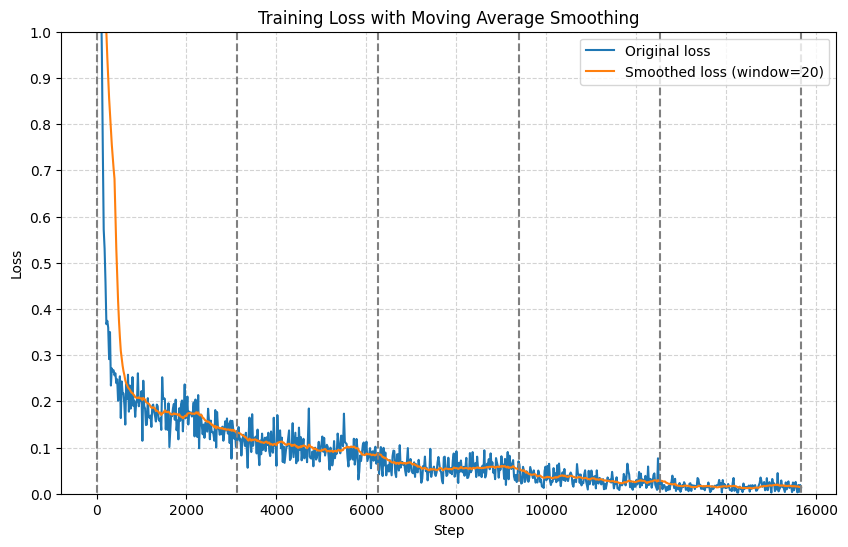

In [15]:
n_epochs = 5
epoch_len = df['step'].max() // n_epochs
y_step = 0.1

plt.figure(figsize=(10, 6))
plt.plot(df["step"], df["loss"], label="Original loss")
plt.plot(df["step"], df["smoothed_loss"], label=f"Smoothed loss (window={window})")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss with Moving Average Smoothing")
plt.ylim(0, 1)
plt.yticks([i*y_step for i in range(0, int(1/y_step)+1)])
plt.grid('minor', c='lightgrey', linestyle='--')
plt.vlines([i for i in range(0, max(df['step'])+20, epoch_len)], -10, 10, color='grey', linestyle='--')

# plt.ylim(0, 0.1)
plt.show()